In [168]:
import numpy as np
import scipy as sp
from numpy.polynomial import polynomial as poly
from numpy.polynomial import Polynomial
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [124]:
degree = 5
poly_base = []
for i in range(degree + 1):
    poly_base.append(Polynomial.basis(deg= i))
    print(poly_base[i])

1.0
0.0 + 1.0·x
0.0 + 0.0·x + 1.0·x²
0.0 + 0.0·x + 0.0·x² + 1.0·x³
0.0 + 0.0·x + 0.0·x² + 0.0·x³ + 1.0·x⁴
0.0 + 0.0·x + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 1.0·x⁵


In [154]:
orthonorm_base = []
for i in range(degree + 1):
    new_base = poly_base[i]
    for j in range(i):
        numer = sp.integrate.quad((poly_base[i] * orthonorm_base[j]), -np.pi, np.pi)[0]
        denom = sp.integrate.quad((orthonorm_base[j] ** 2), -np.pi, np.pi)[0]
        new_base = new_base -  ((numer / denom) * orthonorm_base[j])
    orthonorm_base.append(new_base)
for i in range(len(orthonorm_base)):
    norm = np.sqrt(np.reciprocal(sp.integrate.quad(orthonorm_base[i] ** 2, -np.pi, np.pi)[0]))
    orthonorm_base[i] = orthonorm_base[i] * norm 

In [161]:
projections = []
for i in range(len(orthonorm_base)):
    numer = sp.integrate.quad(lambda t: np.sin(t) * orthonorm_base[i](t), -np.pi, np.pi)[0]
    denom = sp.integrate.quad(orthonorm_base[i] ** 2, -np.pi, np.pi)[0]
    projections.append(
        numer * orthonorm_base[i]
    )
    print(projections[i])
u_x = np.sum(projections)
u_x

0.0
0.0 + 0.30396355·x
0.0
0.0 + 0.55301978·x + 0.0·x² - 0.0933877·x³
0.0
0.0 + 0.13087881·x + 0.0·x² - 0.06188371·x³ + 0.0·x⁴ + 0.00564312·x⁵


Polynomial([ 0.        ,  0.98786214,  0.        , -0.15527141,  0.        ,
        0.00564312], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [195]:
df = pd.DataFrame({
    "x": np.linspace(-np.pi, np.pi, 1000)
})
df["sin"] = np.sin(df["x"])

In [ ]:
fit_poly = Polynomial(poly.polyfit(df["x"], df["sin"], deg= 5))
fit_poly

Polynomial([-7.11693974e-18,  9.87795692e-01,  8.56378944e-17, -1.55231044e-01,
       -3.04040751e-17,  5.63862198e-03], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [199]:
df = pd.DataFrame({
    "x": np.linspace(-4, 4, 1000)
})
df["sin"] = np.sin(df["x"])
df["approx"] = u_x(df["x"])
df["polyfit"] = fit_poly(df["x"])

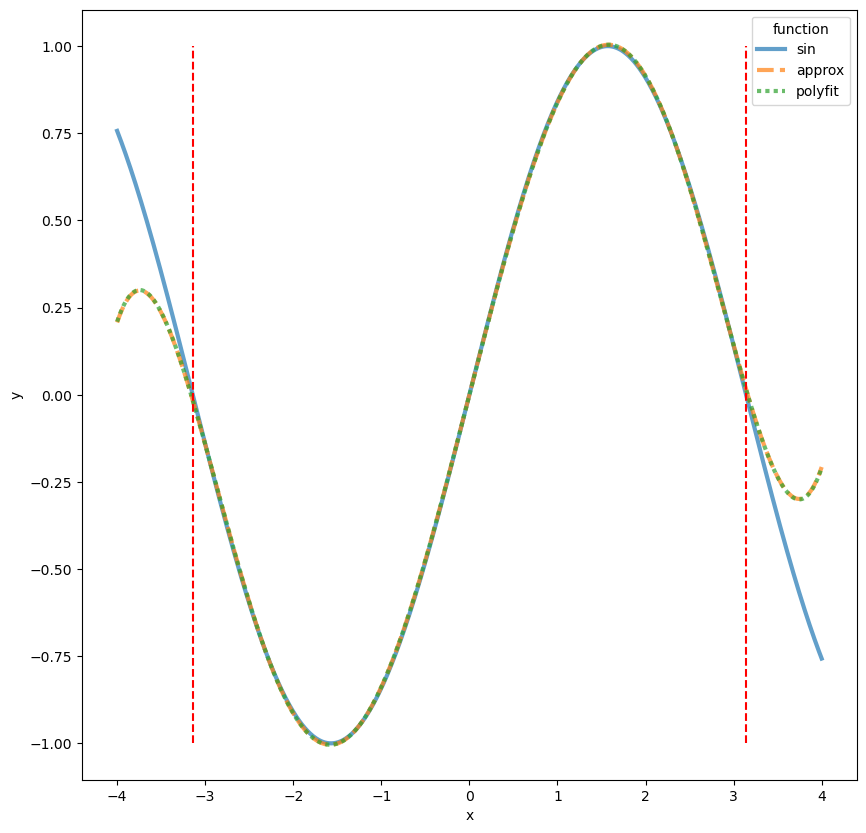

In [214]:
fig, ax = plt.subplots(figsize= (10,10))
sns.lineplot(
    df.melt(id_vars= "x", value_vars= df.columns.drop("x"), value_name= "y", var_name= "function"),
    x= "x",
    y= "y",
    hue= "function",
    style= "function",
    linewidth= 3,
    alpha= 0.7
)
ax.vlines([-np.pi, np.pi], ymax= 1, ymin= -1, linestyles= "--", colors= "r")